In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Latin Modern Roman"],  # matches Overleaf lmodern
    "mathtext.fontset": "cm",
    "text.latex.preamble": r"\usepackage{lmodern}\usepackage{amsmath}"
})


pd.set_option("display.width", 300)
pd.set_option("display.max_columns", 14)

# Load 'Topics' Data

In [2]:
audience_topics = pd.read_json("NLP Data/Audience Topic Data/rt_audience_topics_aggregated.json")

critic_topics = pd.read_json("NLP Data/Critic Topic Data/rt_critic_topics_aggregated.json")

combined = pd.merge(left=audience_topics.rename(columns={"TopicCount": "TopicCountAudience"}),
                    right=critic_topics.rename(columns={"TopicCount": "TopicCountCritic"}),
                    on=["Topic", "TopicLabel"],
                    how="outer")

combined.head(35)


,Topic,TopicLabel,TopicCountAudience,TopicCountCritic
0,-1,-1_direction_visuals_instinct_commentaries,103737.0,42014.0
1,0,Movie,235451.0,86950.0
2,1,Acting,167977.0,42194.0
3,2,Storyline,76217.0,17397.0
4,3,Characters,57304.0,24323.0
5,4,Plot,57774.0,10956.0
6,5,Cast,53963.0,12015.0
7,6,Soundtrack,40655.0,7999.0
8,7,Script,34363.0,11310.0
9,8,Direction,28899.0,12708.0


# Calculate Review Topic Discussion Differential for each Topic

## Extract Total Aspect Count for Normalization of Topic Counts

In [3]:
audience_aspect_count = pd.concat([pd.read_json(f"NLP Data/Audience Topic Data/rt_audience_reviews_topics_{i}.json") for i in range(25)]).shape[0]

critic_aspect_count = pd.concat([pd.read_json(f"NLP Data/Critic Topic Data/rt_critic_reviews_topics_{i}.json") for i in range(20)]).shape[0]

print(f"Number of audience aspects: {audience_aspect_count}")
print(f"Number of critic aspects: {critic_aspect_count}")
print(f"Total Number of Aspects: {audience_aspect_count+critic_aspect_count}")

Number of audience aspects: 1756566
Number of critic aspects: 806352
Total Number of Aspects: 2562918


In [4]:
print(f"Aspects per Audience Review: {round(audience_aspect_count / 1665270, ndigits=2)}")
print(f"Aspects per Critic Review: {round(critic_aspect_count / 936349, ndigits=2)}")

print(f"Aspects per Review: {round((audience_aspect_count+critic_aspect_count) / (1665270 + 936349), ndigits=2)}")

Aspects per Audience Review: 1.05
Aspects per Critic Review: 0.86
Aspects per Review: 0.99


## Normalize Topic Counts by Aspect Count

In [5]:
combined["NormByAspectAudience"] = combined["TopicCountAudience"]/audience_aspect_count
combined["NormByAspectCritic"] = combined["TopicCountCritic"]/critic_aspect_count
combined["weightedScore"] = combined["NormByAspectAudience"] + combined["NormByAspectCritic"]
combined.drop(combined[combined["Topic"] == -1].index, axis=0, inplace=True)

combined.sort_values("weightedScore", ascending=False, inplace=True)
combined.reset_index(inplace=True, drop=True)

combined.head(31)

,Topic,TopicLabel,TopicCountAudience,TopicCountCritic,NormByAspectAudience,NormByAspectCritic,weightedScore
0,0,Movie,235451.0,86950.0,0.134041,0.107831,0.241872
1,1,Acting,167977.0,42194.0,0.095628,0.052327,0.147955
2,2,Storyline,76217.0,17397.0,0.043390,0.021575,0.064965
3,3,Characters,57304.0,24323.0,0.032623,0.030164,0.062787
4,4,Plot,57774.0,10956.0,0.032890,0.013587,0.046477
5,5,Cast,53963.0,12015.0,0.030721,0.014900,0.045621
6,7,Script,34363.0,11310.0,0.019563,0.014026,0.033589
7,6,Soundtrack,40655.0,7999.0,0.023145,0.009920,0.033065
8,8,Direction,28899.0,12708.0,0.016452,0.015760,0.032212
9,9,Comedy/Humour,23660.0,13708.0,0.013469,0.017000,0.030469


## Calculate Topic Discussion Differential (Normalized by Aspect Count)

In [6]:
combined["TDDAspect"] = (combined["NormByAspectAudience"] - combined["NormByAspectCritic"]) / (combined["NormByAspectAudience"] + combined["NormByAspectCritic"])
combined.head()

,Topic,TopicLabel,TopicCountAudience,TopicCountCritic,NormByAspectAudience,NormByAspectCritic,weightedScore,TDDAspect
0,0,Movie,235451.0,86950.0,0.134041,0.107831,0.241872,0.108360
1,1,Acting,167977.0,42194.0,0.095628,0.052327,0.147955,0.292663
2,2,Storyline,76217.0,17397.0,0.043390,0.021575,0.064965,0.335795
3,3,Characters,57304.0,24323.0,0.032623,0.030164,0.062787,0.039156
4,4,Plot,57774.0,10956.0,0.032890,0.013587,0.046477,0.415324


# Plot Topic Similarity of 'Critic' and 'Audience' Reviews (Normalized by Aspect Count)

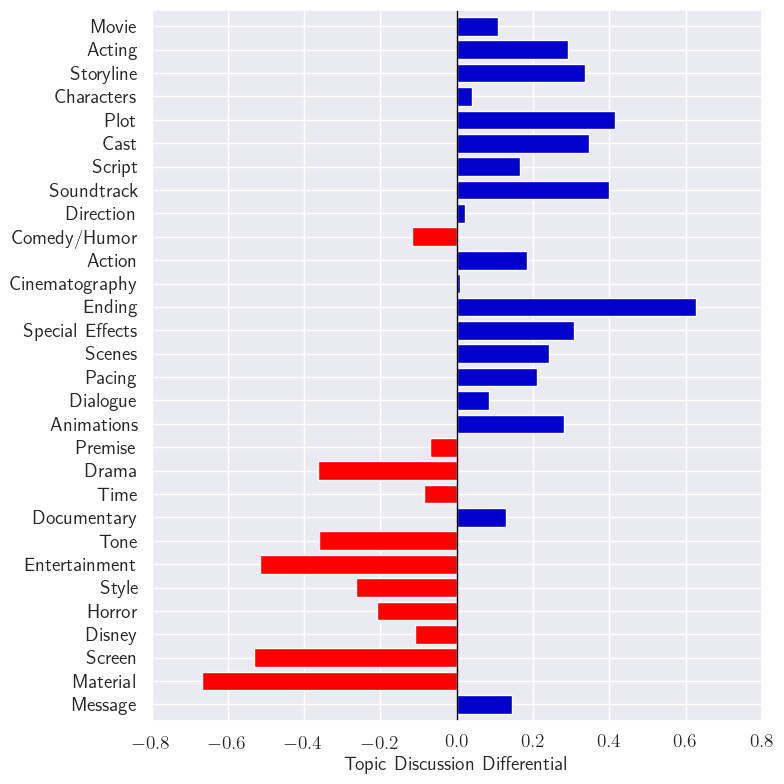

In [7]:
plot_data = combined.loc[:29,["Topic", "TopicLabel", "TDDAspect"]].copy()

plot_data.loc[plot_data["TopicLabel"] == "Comedy/Humour", "TopicLabel"] = "Comedy/Humor"

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(8,8))
ax.barh(plot_data["TopicLabel"], plot_data["TDDAspect"], 
         color=plot_data["TDDAspect"].apply(lambda x: "red" if x < 0 else "mediumblue"))
ax.axvline(0, color="black", linewidth=1)
ax.set_xlabel("Topic Discussion Differential", fontsize=14)
#ax.set_title("Critic- vs Audience-Oriented Topics (Top 30)", fontweight="bold", fontsize=16)
ax.set_xlim(-0.8,0.8)
ax.invert_yaxis()
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.margins(y=0.01)

fig.subplots_adjust(bottom=0.2)

fig.tight_layout()
plt.show()